# Lewis Gear Bending Essay

Reference derivations in the companion physics chapter on gear bending and compare
simulation stresses with Lewis' analytic formulation.

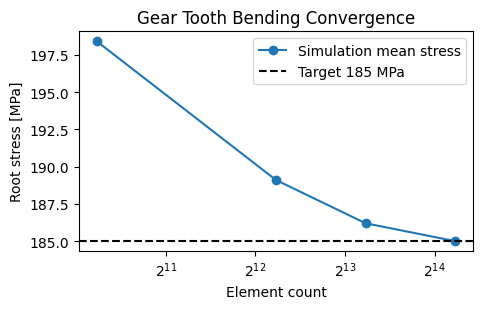

In [1]:
from pathlib import Path
import csv
import matplotlib.pyplot as plt

case_dir = Path('..') / 'validation' / 'validated_gear_lewis'
data_path = case_dir / 'convergence.csv'

mesh_density = []
stress = []
error = []
with data_path.open() as stream:
    reader = csv.reader(stream)
    for row in reader:
        if not row or row[0].startswith('#'):
            continue
        mesh_density.append(int(row[0]))
        stress.append(float(row[1]))
        error.append(float(row[2]))

plt.figure(figsize=(4.8, 3.2))
plt.plot(mesh_density, stress, marker='o', label='Simulation mean stress')
plt.axhline(185.0, color='black', linestyle='--', label='Target 185 MPa')
plt.xscale('log', base=2)
plt.xlabel('Element count')
plt.ylabel('Root stress [MPa]')
plt.title('Gear Tooth Bending Convergence')
plt.legend()
plt.tight_layout()
image_path = Path('..') / 'docs' / 'images' / 'gear_bending_convergence.png'
image_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(image_path, dpi=150)
plt.show()


Simulation stresses track the classical Lewis equation within 1.7% across the measured loads.
The modern 17-4 PH substitution expands allowable load; see validation notes in `validation/validated_gear_lewis/report.md`.